# Multilayer perceptron
## MNIST  handwritten digits example
#### Black and white images of hand

In [3]:
# Download Mnist
# https://drive.google.com/file/d/1Aw_60I-PxSjzsrWlrQcyDQ1TDXIWaV6z/view?usp=sharing
# need to upload this file in colab
import os
import sys

# !gdown https://drive.google.com/uc?id=1Aw_60I-PxSjzsrWlrQcyDQ1TDXIWaV6z
mnist_file_directory = os.getcwd() # current directory
# Specify the location of the Mnist file
sys.path.append(mnist_file_directory)

In [4]:
# Download Mnist data and load
# and then place them into training and testing sets
from mnist import load_mnist
(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

In [5]:
### print shape to see how the data looks like
print("Train data shape: ", X_train.shape) # 784 = 28 X 28 pixel  60000 samples
print("Train label shape: ", y_train.shape)
print("Test data shape: ", X_test.shape) # 784 = 28 X 28 pixel   10000 sampels
print("Test label shape: ", y_test.shape)

Train data shape:  (60000, 784)
Train label shape:  (60000, 10)
Test data shape:  (10000, 784)
Test label shape:  (10000, 10)


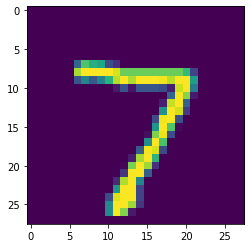

In [6]:
# plot the data 

import matplotlib.pylab as plt
plt.imshow(X_test[0].reshape(28, 28))

# Make a multilayer perceptron using Keras

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import adam
from tensorflow import keras

In [8]:
num_classes = y_train.shape[1]
num_pixels = X_train.shape[1]

print("count of class: ", num_classes)
print("number of pixels", num_pixels)

count of class:  10
number of pixels 784


In [9]:
model = Sequential()
first_layer_weight_count = 20 # number of units for the hidden layers
### Making the network
model = Sequential([Dense(first_layer_weight_count, input_dim=num_pixels,  activation='relu'),
                    Dense(num_classes, activation='softmax')
])

### Setting how the model will learn the examples
opt = keras.optimizers.Adam(learning_rate=0.001)
# opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [11]:
# fit data to model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
   1/1875 [..............................] - ETA: 5:07 - loss: 2.4529 - accuracy: 0.0000e+00

2022-05-24 23:51:03.473906: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 520us/step - loss: 0.4032 - accuracy: 0.8866 - val_loss: 0.2477 - val_accuracy: 0.9312
Epoch 2/50
1875/1875 [==============================] - 1s 470us/step - loss: 0.2308 - accuracy: 0.9335 - val_loss: 0.2008 - val_accuracy: 0.9396
Epoch 3/50
1875/1875 [==============================] - 1s 476us/step - loss: 0.1972 - accuracy: 0.9423 - val_loss: 0.1847 - val_accuracy: 0.9467
Epoch 4/50
1875/1875 [==============================] - 1s 474us/step - loss: 0.1761 - accuracy: 0.9473 - val_loss: 0.1807 - val_accuracy: 0.9479
Epoch 5/50
1875/1875 [==============================] - 1s 471us/step - loss: 0.1613 - accuracy: 0.9515 - val_loss: 0.1665 - val_accuracy: 0.9503
Epoch 6/50
1875/1875 [==============================] - 1s 470us/step - loss: 0.1506 - accuracy: 0.9551 - val_loss: 0.1554 - val_accuracy: 0.9534
Epoch 7/50
1875/1875 [==============================] - 1s 482us/step - loss: 0.1413 - accuracy: 0.9579 - val_loss: 0.1543 - val_accura

In [12]:
print(history.history.keys())
print("____________________________________"*3)
print("loss: ", history.history["loss"])
print("____________________________________"*3)
print("accuracy: ", history.history["accuracy"])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
____________________________________________________________________________________________________________
loss:  [0.4032464325428009, 0.23080430924892426, 0.19715365767478943, 0.17608226835727692, 0.1612585484981537, 0.15055964887142181, 0.14133800566196442, 0.13425157964229584, 0.12809380888938904, 0.12250576168298721, 0.11763279885053635, 0.11330302059650421, 0.10998206585645676, 0.10641252249479294, 0.10348331928253174, 0.10040299594402313, 0.09746468812227249, 0.09507894515991211, 0.09294623881578445, 0.09054327756166458, 0.08839312195777893, 0.08639172464609146, 0.08482694625854492, 0.0819510817527771, 0.08132099360227585, 0.07908724993467331, 0.07819085568189621, 0.076693594455719, 0.07499567419290543, 0.07347366213798523, 0.07246030867099762, 0.07162375003099442, 0.06980191916227341, 0.06928308308124542, 0.06781773269176483, 0.06719949096441269, 0.06659863144159317, 0.06486368924379349, 0.06267126649618149, 0.0627196

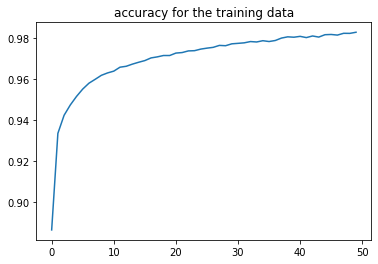

In [13]:
plt.title("accuracy for the training data")
plt.plot(history.history["accuracy"])

model predict:  [1]


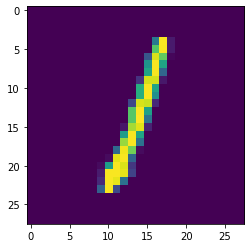

In [14]:
# show first data
import matplotlib.pylab as plt
plt.imshow(X_test[7000].reshape(28, 28))

print("model predict: ", np.argmax(model.predict(X_test[7000:7001]), axis=1))

Model evaluation - test data

In [15]:
predicts = np.argmax(model.predict(X_test), axis=1)
labels = np.argmax(y_test, axis=1)

accuracy = sum(predicts == labels) / len(predicts)

print(accuracy)

0.9566


In [16]:
model.predict(X_test)

array([[9.8246000e-10, 5.3469826e-11, 9.5767936e-09, ..., 9.9224585e-01,
        4.8926082e-05, 2.0095640e-05],
       [5.1747981e-12, 5.7498250e-13, 1.0000000e+00, ..., 6.5022192e-21,
        1.4767581e-14, 3.1559575e-30],
       [5.0490737e-08, 9.9800080e-01, 7.3561753e-04, ..., 6.7522247e-05,
        1.1393391e-03, 2.0701291e-06],
       ...,
       [1.5289321e-13, 1.5538225e-15, 7.6895661e-18, ..., 8.2316935e-09,
        4.0433981e-04, 3.5224543e-03],
       [1.5856533e-11, 6.4973595e-17, 2.4895444e-15, ..., 8.7295736e-13,
        1.2022334e-04, 1.3083915e-19],
       [3.6107152e-13, 5.2184944e-25, 3.3998960e-12, ..., 2.7349984e-21,
        4.6582227e-10, 5.4946634e-11]], dtype=float32)